In [2]:
%load_ext autoreload
%autoreload

In [32]:
from trace import Trace
import numpy as np
from numpy.random import randint, normal, uniform

class Level(object):
    def __init__(self, peaks, dim):
        self.dim = dim
        self.peaks = peaks
        self.previous_trace = None
        self.current_trace = None
        self.next_trace = None
        
        self.top_pad = 10
        self.bottom_pad = 10
        
        self.level_params = {"switch_probability": 0.05, "peak_shift_distance_min": 3, "peak_shift_distance_max": 10, "peak_shift_spread": 1.0}

    def initial_trace(self):
        self.current_trace = Trace(self.peaks)
        self.current_trace.peaks = randint(0, high=self.dim, size=self.peaks)

    def get_next_trace(self):
        new_trace = Trace(self.peaks)
        for i, (current_peak, next_peak) in enumerate(zip(self.current_trace.peaks, new_trace.peaks)):
            new_pos = self.get_new_peak_position(current_peak)
            while new_pos <= self.bottom_pad or new_pos >= self.dim-self.top_pad:
                new_pos = self.get_new_peak_position(current_peak)
            new_trace.peaks[i] = new_pos
        return new_trace

    def get_new_peak_position(self, current_pos):
        switch = 1
        if uniform() < self.level_params["switch_probability"]:
            switch = -1
        peak_shift_distance = randint(self.level_params["peak_shift_distance_min"], high=self.level_params["peak_shift_distance_max"])
        shift = int(normal(loc=0.0,scale=self.level_params["peak_shift_spread"])*peak_shift_distance*switch)
        new_pos = current_pos+shift
        return new_pos
    
    
    def push_next_trace(self):
        self.previous_trace = self.current_trace
        self.current_trace = self.get_next_trace()

In [33]:
new_level = Level(1, 800)
new_level.initial_trace()
print new_level.current_trace.peaks
for i in range(10):
    new_level.push_next_trace()
    print new_level.current_trace.peaks
    

[366]
[362]
[356]
[368]
[368]
[366]
[372]
[386]
[388]
[403]
[405]


In [34]:
from survey import Survey

In [58]:
surv = Survey()
surv.data = np.divide(surv.data, max(np.abs(surv.data.flatten())))

In [59]:
print surv.data

[[ 0.          0.          0.         ...,  0.43800165  0.57573168  0.        ]
 [ 0.          0.          0.         ...,  1.         -0.50395215  0.        ]
 [ 0.          0.          0.         ...,  0.51472518 -0.54481643  0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.07757805  0.          0.        ]
 [ 0.          0.          0.         ..., -0.04983673  0.          0.        ]
 [ 0.          0.          0.         ...,  0.02453688  0.          0.        ]]


In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

(2791, 751)
1.0


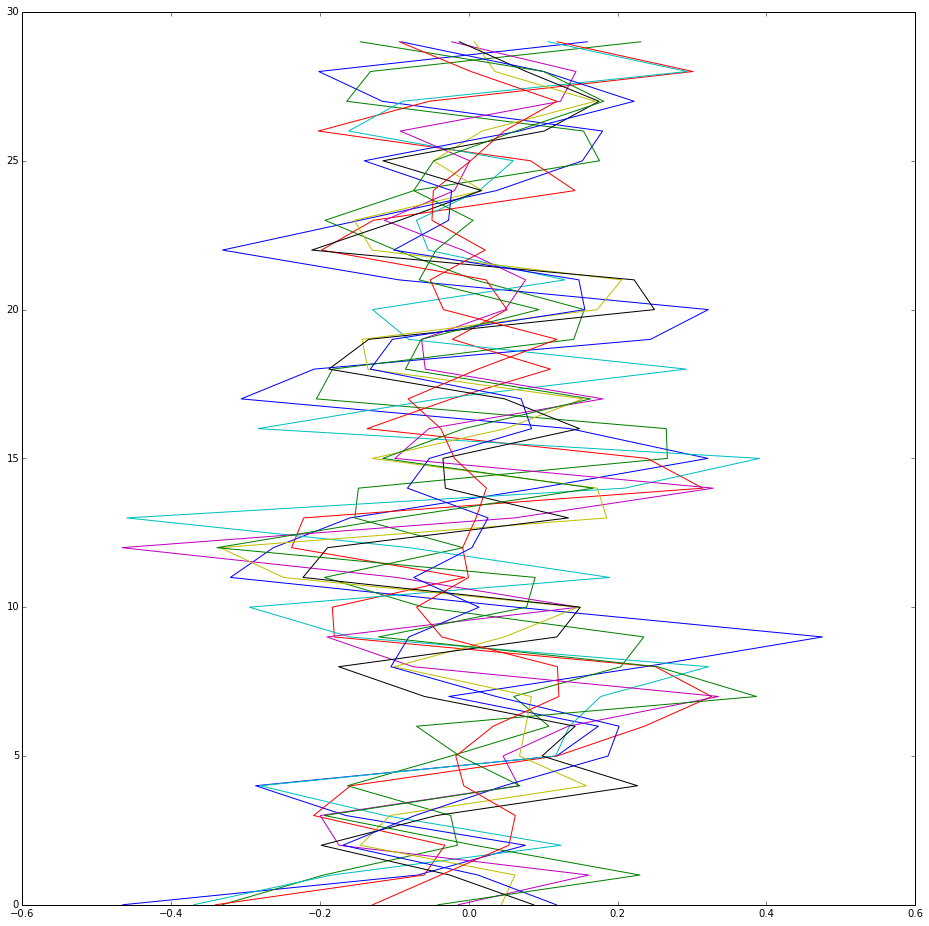

In [65]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
print surv.data.shape
print max(surv.data.flatten())
for i in range(10):
    ax.plot(surv.data[i, 100:130], range(len(surv.data[i, 100:130])))
plt.show()